In [3]:
import math

import matplotlib.pyplot as plt
import numpy as np
import os
import time

import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
import qiskit as qiskit
import qiskit.quantum_info as qi
from qiskit import QuantumCircuit, transpile, Aer, IBMQ

import ramsey_experiment

# Loading your IBM Quantum account(s)
IBMQ.save_account(os.environ.get('IBM_KEY'), overwrite=True)
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-research')
import Ramsey_ExperimentV2
import random
import importlib
from tqdm import tqdm
ramsey_experiment = importlib.reload(Ramsey_ExperimentV2)
RamseyExperiment = ramsey_experiment.RamseyExperiment
RamseyBatch = ramsey_experiment.RamseyBatch

ibmqfactory.load_account:WARNING:2024-02-29 16:25:39,577: Credentials are already in use. The existing account in the session will be replaced.


In [7]:
import numpy as np
import math
n = 4
total_shots = 10000
T = np.pi
measurements = 100
delay = np.linspace(0, T, measurements)

W = [random.gauss(0, 3) for _ in range(n)]
L = [random.gauss(3, 1) for _ in range(n)]
J = [random.gauss(0, 3) for _ in range(n - 1)]
#
# L = [3,3,3]
# J = [4,4]
# W = [4,4,4]

batch_x = []
batch_y = []

delay = [0.3]
for t in tqdm(delay):
    shots = int(total_shots/2)
    exp_x = RamseyExperiment(n, t, shots, J, W, L, basis="X")
    exp_y = RamseyExperiment(n, t, shots, J, W, L, basis="Y")
    exp_x.create_full_circuit()
    exp_y.create_full_circuit()
    exp_x.add_decay_raw()
    exp_y.add_decay_raw()
    batch_x.append(exp_x)
    batch_y.append(exp_y)

batch_x = RamseyBatch(batch_x)
batch_y = RamseyBatch(batch_y)

batch_x_det = []
batch_x_cross = []
batch_y_det = []
batch_y_cross = []

for t in tqdm(delay):
    shots = int(total_shots/4)
    exp_x_det = RamseyExperiment(n, t, shots, J, W, L, basis="X")
    exp_y_det = RamseyExperiment(n, t, shots, J, W, L, basis="Y")
    exp_x_cross = RamseyExperiment(n, t, shots, J, W, L, basis="X")
    exp_y_cross = RamseyExperiment(n, t, shots, J, W, L, basis="Y")

    exp_x_det.create_circuit_detuning()
    exp_y_det.create_circuit_detuning()
    exp_x_cross.create_circuit_crosstalk()
    exp_y_cross.create_circuit_crosstalk()

    exp_x_det.add_decay_raw()
    exp_y_det.add_decay_raw()
    exp_x_cross.add_decay_raw()
    exp_y_cross.add_decay_raw()

    batch_x_det.append(exp_x_det)
    batch_y_det.append(exp_y_det)
    batch_x_cross.append(exp_x_cross)
    batch_y_cross.append(exp_y_cross)


batch_x_det = RamseyBatch(batch_x_det)
batch_y_det = RamseyBatch(batch_y_det)
batch_x_cross = RamseyBatch(batch_x_cross)
batch_y_cross = RamseyBatch(batch_y_cross)


100%|██████████| 1/1 [00:00<00:00,  3.16it/s]


In [55]:
ramsey_experiment = importlib.reload(Ramsey_ExperimentV2)
RamseyExperiment = ramsey_experiment.RamseyExperiment
RamseyBatch = ramsey_experiment.RamseyBatch

## qubit by qubit


In [8]:

guessed_decay,guessed_W,guessed_J = ramsey_experiment.one_by_one_fit(batch_x_det, batch_y_det, batch_x_cross, batch_y_cross)
print("guessed decay: ", guessed_decay)
print("real decay: ", L)
print("guessed frequency: ", guessed_W)
print("real frequency: ", W)
print("guessed J: ", guessed_J)
print("real J: ", J)

guessed = np.concatenate([guessed_decay,guessed_W,guessed_J])
real_parameters = np.concatenate([L,W,J])
mse = np.mean((guessed - real_parameters)**2)
print("error: ", np.sqrt(mse))
print("error in percent: ", np.sqrt(mse)/np.mean(np.abs(real_parameters)) * 100)

guessed decay:  [2.2558154349904056, 2.117500243836111, 4.369283608748806, 3.7773071998137167]
real decay:  [2.54852642270674, 2.019306481861285, 4.132039728543912, 3.7651274137060406]
guessed frequency:  [2.5066767034972837, -3.577925927297255, 2.450068854054635, -0.4401966745808719]
real frequency:  [2.7062362646115443, -3.6634883371055706, 2.583042929939851, -0.6996862800250638]
guessed J:  [-0.6463851790187427, -0.6437151220823825, 1.519316852577039]
real J:  [-1.0220244695554248, -0.7894454343182669, 1.3325733741291828]
error:  0.20913935652887944
error in percent:  9.106874819756435


## global

In [25]:

neighbors = 1
guessed_decay,guessed_W,guessed_J = ramsey_experiment.full_complex_fit(batch_x, batch_y, neighbors=neighbors)

print("guessed decay: ", guessed_decay)
print("real decay: ", L)
print("guessed frequency: ", guessed_W)
print("real frequency: ", W)
print("guessed J: ", guessed_J)
print("real J: ", J)

guessed = np.concatenate([guessed_decay,guessed_W,guessed_J])
real_parameters = np.concatenate([L,W,J])
mse = np.mean((guessed - real_parameters)**2)
print("error: ", np.sqrt(mse))
print("error in percent: ", np.sqrt(mse)/np.mean(np.abs(real_parameters)) * 100)
print("number of neighbors: ", neighbors)

guessed decay:  [2.51087863 1.92017758 4.18364043 3.29673457]
real decay:  [2.54852642270674, 2.019306481861285, 4.132039728543912, 3.7651274137060406]
guessed frequency:  [ 2.80887019 -3.66036706  1.72546204 -1.17141773]
real frequency:  [2.7062362646115443, -3.6634883371055706, 2.583042929939851, -0.6996862800250638]
guessed J:  [-1.10825328 -1.0170087   3.12282177]
real J:  [-1.0220244695554248, -0.7894454343182669, 1.3325733741291828]
error:  0.6371832300180734
error in percent:  27.745843772936063
number of neighbors:  1


## global Noise

In [56]:

neighbors = 1
guessed_decay,guessed_W,guessed_J = ramsey_experiment.full_complex_fit_noise(batch_x, batch_y, total_shots, neighbors=neighbors)

print("guessed decay: ", guessed_decay)
print("real decay: ", L)
print("guessed frequency: ", guessed_W)
print("real frequency: ", W)
print("guessed J: ", guessed_J)
print("real J: ", J)

guessed = np.concatenate([guessed_decay,guessed_W,guessed_J])
real_parameters = np.concatenate([L,W,J])
mse = np.mean((guessed - real_parameters)**2)
print("error: ", np.sqrt(mse))
print("error in percent: ", np.sqrt(mse)/np.mean(np.abs(real_parameters)) * 100)
print("number of neighbors: ", neighbors)

ValueError: zero-dimensional arrays cannot be concatenated

In [11]:
import Symbolic.symbolic_evolution as symbolic_evolution
importlib.reload(symbolic_evolution)
symbolic_exp = symbolic_evolution.get_expectation_values_exp(n, neighbors=neighbors)


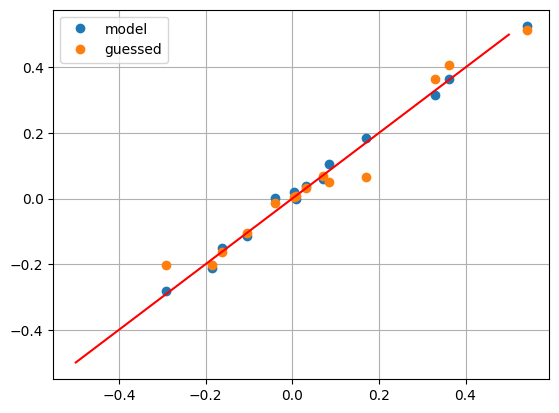

In [34]:
import matplotlib.pyplot as plt

data = []
for i in range(len(delay)):
    data.append(batch_x.RamseyExperiments[i].get_n_nearest_neighbors(neighbors))
    data.append(batch_y.RamseyExperiments[i].get_n_nearest_neighbors(neighbors))
data = np.concatenate(data)

model = []
guessed = []
for t in delay:
    for i in range(2*(n+n-1)):
        model.append(symbolic_evolution.set_parameters(symbolic_exp[i],W,J,L,t))
        guessed.append(symbolic_evolution.set_parameters(symbolic_exp[i], guessed_W, guessed_J, guessed_decay,t))


# plt.plot(data, model_func(delay,guessed_decay,guessed_W,guessed_J), 'o')
plt.plot(data, model, 'o', label="model")
plt.plot(data, guessed, 'o', label="guessed")
plt.plot(np.linspace(-0.5,0.5,40), np.linspace(-0.5,0.5,40), 'r')
plt.grid()
plt.legend()
# print(z_points - model_func(delay,L,W,J))